In [ ]:
!pip install scikit-multiflow

     |████████████████████████████████| 1.1 MB 2.8 MB/s 


In [ ]:
%matplotlib inline
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
import matplotlib.pyplot as plt

In [ ]:
# 1. Create a stream
stream = WaveformGenerator()

In [ ]:
# 2. Instantiate the HoeffdingTreeClassifier
ht = HoeffdingTreeClassifier()

In [ ]:
 # 3. Setup the evaluator
 evaluator = EvaluatePrequential(show_plot=True,pretrain_size=200,max_samples=20000)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...


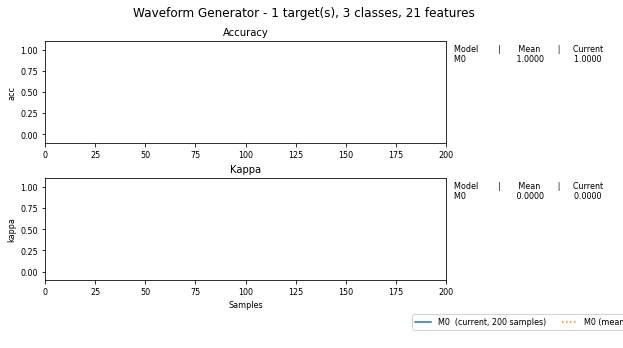

<Figure size 432x288 with 0 Axes>

 #------------------- [5%] [1.35s]

<Figure size 432x288 with 0 Axes>

 ##------------------ [10%] [2.46s]

<Figure size 432x288 with 0 Axes>

 ###----------------- [15%] [3.58s]

<Figure size 432x288 with 0 Axes>

 ####---------------- [20%] [4.67s]

<Figure size 432x288 with 0 Axes>

 #####--------------- [25%] [5.74s]

<Figure size 432x288 with 0 Axes>

 ######-------------- [30%] [6.86s]

<Figure size 432x288 with 0 Axes>

 #######------------- [35%] [7.95s]

<Figure size 432x288 with 0 Axes>

 ########------------ [40%] [9.06s]

<Figure size 432x288 with 0 Axes>

 #########----------- [45%] [10.07s]

<Figure size 432x288 with 0 Axes>

 ##########---------- [50%] [11.10s]

<Figure size 432x288 with 0 Axes>

 ###########--------- [55%] [12.17s]

<Figure size 432x288 with 0 Axes>

 ############-------- [60%] [13.18s]

<Figure size 432x288 with 0 Axes>

 #############------- [65%] [14.22s]

<Figure size 432x288 with 0 Axes>

 ##############------ [70%] [15.28s]

<Figure size 432x288 with 0 Axes>

 ###############----- [75%] [16.32s]

<Figure size 432x288 with 0 Axes>

 ################---- [80%] [17.39s]

<Figure size 432x288 with 0 Axes>

 #################--- [85%] [18.46s]

<Figure size 432x288 with 0 Axes>

 ##################-- [90%] [19.55s]

<Figure size 432x288 with 0 Axes>

 #################### [100%] [21.58s]


<Figure size 432x288 with 0 Axes>

Processed samples: 20000
Mean performance:
M0 - Accuracy     : 0.7850
M0 - Kappa        : 0.6774


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [ ]:
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=ht)

In [ ]:
from skmultiflow.data import SEAGenerator

In [ ]:
stream2 = SEAGenerator(random_state=1)

In [ ]:
X, y = stream2.next_sample()

In [ ]:
X.shape

(1, 3)

In [ ]:
y.shape

(1,)

In [ ]:
ht = HoeffdingTreeClassifier()

In [ ]:
# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 200

In [ ]:
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = ht.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    ht = ht.partial_fit(X, y)
    n_samples += 1

In [ ]:
# Display results
print('{} samples analyzed.'.format(n_samples))
print('Hoeffding Tree accuracy: {}'.format(correct_cnt / n_samples))

200 samples analyzed.
Hoeffding Tree accuracy: 0.785
